In [1]:
library(ISLR)
set.seed(666)
train <- sample(1:nrow(Carseats), nrow(Carseats) * 0.75)
Carseats.train <- Carseats[train, ]
Carseats.test <- Carseats[-train, ]

In [2]:
library(tree)
tree.carseats <- tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "CompPrice"  
[6] "Population"  "Advertising" "Education"   "US"         
Number of terminal nodes:  19 
Residual mean deviance:  2.416 = 679 / 281 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.68700 -0.98320 -0.01679  0.00000  1.05900  3.83800 

In [3]:
yhat <- predict(tree.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)

[1] 5.217961

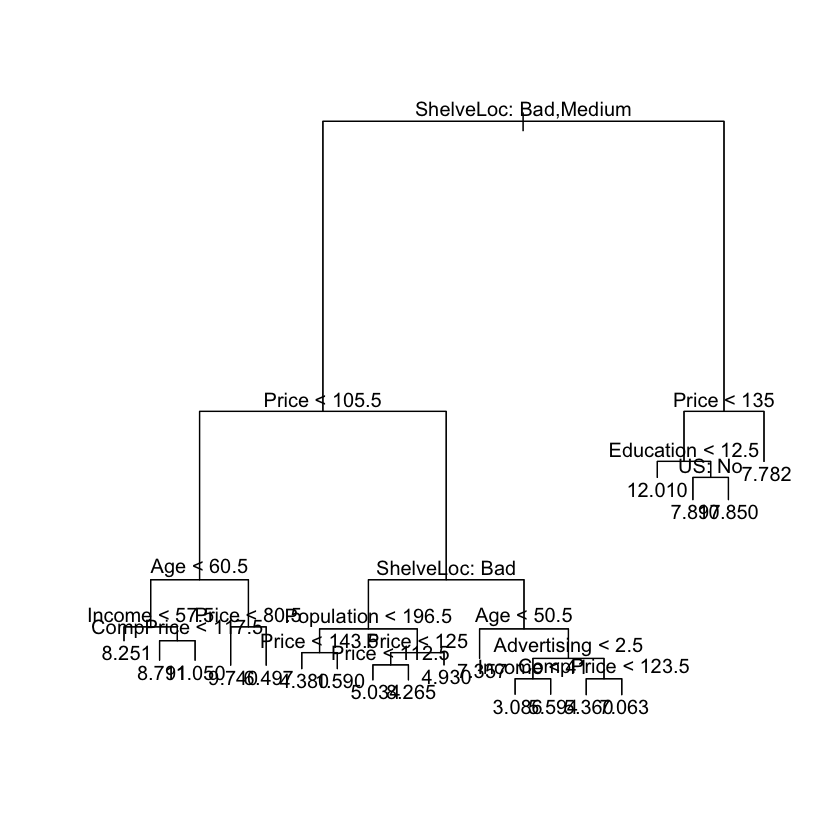

In [4]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

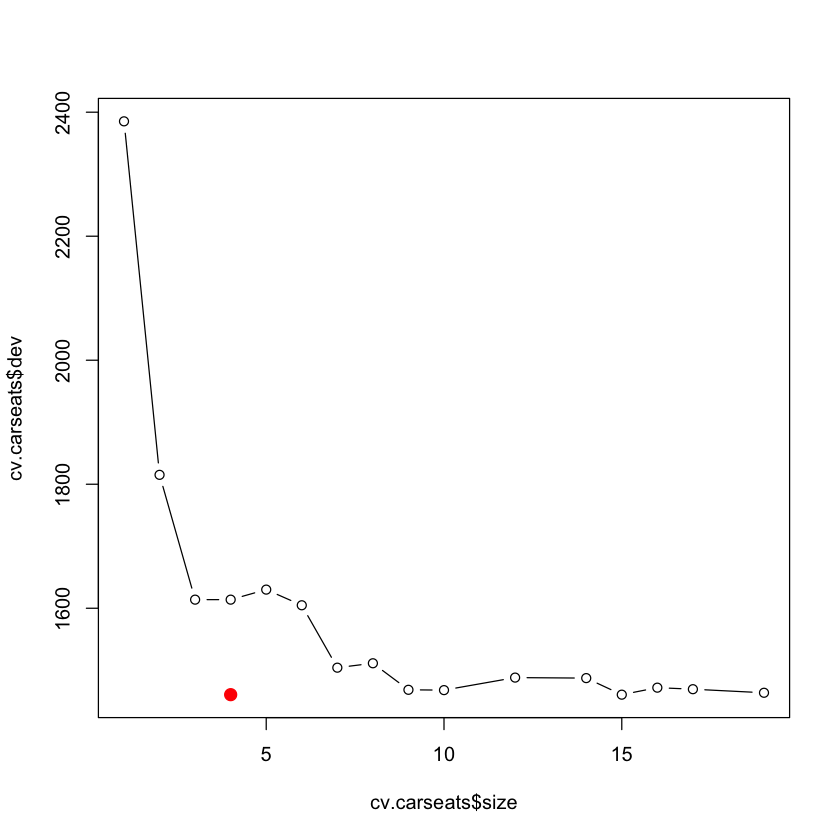

In [5]:
cv.carseats <- cv.tree(tree.carseats)
plot(cv.carseats$size, cv.carseats$dev, type = "b")
tree.min <- which.min(cv.carseats$dev)
points(tree.min, cv.carseats$dev[tree.min], col = "red", cex = 2, pch = 20)

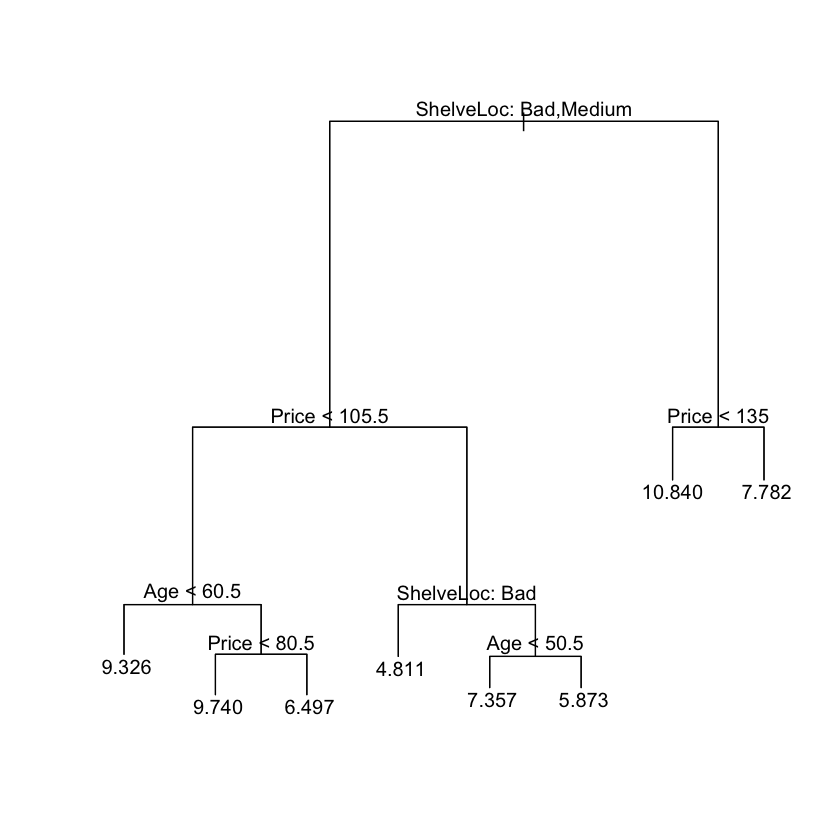

In [6]:
prune.carseats <- prune.tree(tree.carseats, best = 8)
plot(prune.carseats)
text(prune.carseats, pretty = 0)

In [7]:
yhat <- predict(prune.carseats, newdata = Carseats.test)
mean((yhat - Carseats.test$Sales)^2)


[1] 4.805604

In [8]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [9]:
bag.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, importance = TRUE)
yhat.bag <- predict(bag.carseats, newdata = Carseats.test)
mean((yhat.bag - Carseats.test$Sales)^2)

[1] 2.751221

In [10]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,31.0708444,241.56034
Income,12.1118850,139.89585
Advertising,23.4965576,175.22847
Population,-0.9892401,82.95186
Price,67.3375566,697.00514
ShelveLoc,66.7128162,651.03724
Age,24.5283336,204.11548
Education,0.3603859,59.29979
Urban,-3.3623140,10.02579
US,5.4845076,17.60845


In [11]:
rf.carseats <- randomForest(Sales ~ ., data = Carseats.train, mtry = 3, ntree = 500, importance = TRUE)
yhat.rf <- predict(rf.carseats, newdata = Carseats.test)
mean((yhat.rf - Carseats.test$Sales)^2)

[1] 3.056216

In [12]:
importance(rf.carseats)


,%IncMSE,IncNodePurity
CompPrice,14.1966217,195.92287
Income,5.3735784,179.07413
Advertising,18.5203059,227.70977
Population,0.1147289,149.39535
Price,43.8766699,559.86096
ShelveLoc,48.7813074,511.54548
Age,15.2692919,236.56267
Education,2.0614942,90.03332
Urban,-1.6571524,17.80725
US,3.5360887,30.06433
